In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# import gdown
# url = "https://drive.google.com/uc?id=1UBeOQIFwPYwpXVd6gocz1eiquxZEr1Je"
# output = "train.csv"
# gdown.download(url, output)

In [146]:
X_raw = pd.read_csv('train.csv')
X_test_raw = pd.read_csv('test.csv')
X_raw

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,25582,1.0,1,14fdc4b01ae44b025f6c4d28c9097e5f,2016-06-16 02:12:57,Newly renovated bedroom apartment located off ...,29th St,['No pets'],40.7653,7166867,-73.9248,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7166867_625fde3...,1950,30-95 29th St,low
34542,50013,1.0,0,9b6cf886379a2511f8c633c84028efe7,2016-05-10 03:17:32,All apartments are newly renovated featuring: ...,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,6989251,-73.9901,5599e962719af3ccc2976855c2d5893c,['https://photos.renthop.com/2/6989251_42a4884...,2600,39 E 1st St,medium
34543,111475,2.0,2,0,2016-04-21 03:29:35,"<![CDATA[2 bedrooms, 5110, Astoria / Long Isla...",50th Avenue,[],40.7437,6905568,-73.9585,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6905568_01602e3...,5110,2-01 50th Avenue,low
34544,71184,1.0,2,8754cae39f6e053974aa2337017eb3c1,2016-05-14 02:27:47,CooperCooper.com :: Listing ID #10_0385; 400 W...,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,7010187,-73.9866,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7010187_ab1db5d...,3400,400 West 56th Street,medium


Сразу дропнем id, manager_id, listing_id и building_id

In [4]:
X = X_raw.copy()

In [5]:
X.drop(columns=['Id', 'manager_id', 'listing_id', 'building_id'], inplace=True)

In [6]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

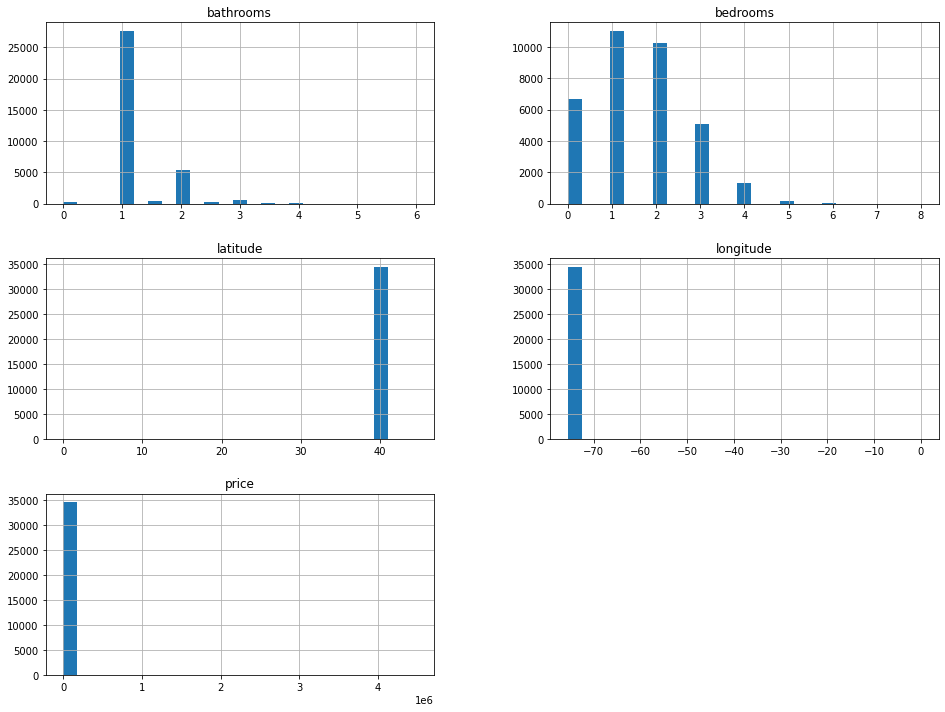

In [7]:
X.hist(bins=25, figsize=(16,12))
plt.show()

Введем новый признак - стоимость комнаты

In [8]:
Counter(X['bathrooms'] + X['bedrooms'])

Counter({4.0: 4850,
         2.0: 10748,
         1.0: 6574,
         3.0: 7777,
         5.0: 2220,
         6.0: 1138,
         4.5: 211,
         7.0: 211,
         2.5: 116,
         3.5: 160,
         5.5: 155,
         8.0: 87,
         9.0: 55,
         7.5: 26,
         6.5: 61,
         0.0: 105,
         8.5: 17,
         10.5: 2,
         10.0: 13,
         9.5: 7,
         1.5: 8,
         11.0: 4,
         12.0: 1})

Все-таки достаточно часто бывает нецелое число ванных, наверное это нормально, оставим как есть

У 105 квартир количество комнат равно нулю, примем, что там есть одна комната

In [9]:
def calc_cost_of_room(data):
    for i in range(data.shape[0]):
        k_rooms = data.loc[i, 'bathrooms'] + data.loc[i, 'bedrooms']
        if k_rooms == 0:
            data.loc[i, 'cost_of_room'] = data.loc[i, 'price']
        else:
            data.loc[i, 'cost_of_room'] = data.loc[i, 'price'] / k_rooms

In [10]:
calc_cost_of_room(X)

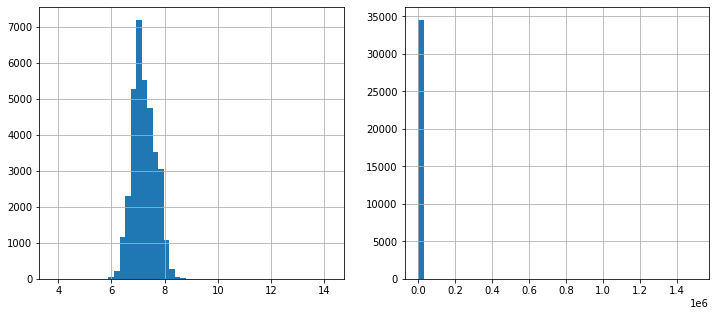

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
np.log(X['cost_of_room']).hist(bins=50, ax=axs[0])
X['cost_of_room'].hist(bins=50, ax=axs[1])
plt.show()

Ну наверное, надо логарифмировать

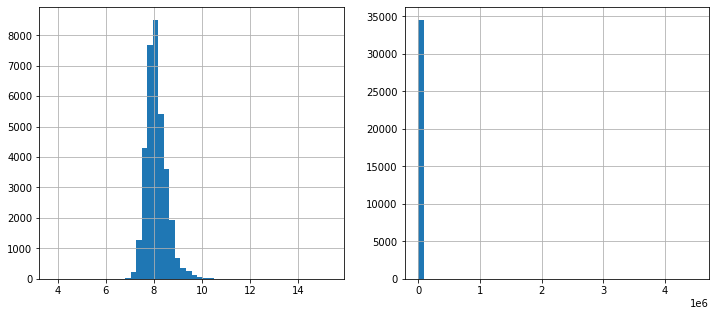

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
np.log(X['price']).hist(bins=50, ax=axs[0])
X['price'].hist(bins=50, ax=axs[1])
plt.show()

И обычную цену тоже

In [13]:
def log_prices(data):
    data['log_price'] = np.log(data['price'])
    data['log_cost'] = np.log(data['cost_of_room'])

In [14]:
log_prices(X)

Из другой домашки возьмем идею по добавлению количества объявлений за день, час, месяц

In [15]:
def add_times(data):
    data['created'] = pd.to_datetime(data.created)
    month_year = (data.created.dt.month + data.created.dt.year * 100)
    month_year_cnt_map = month_year.value_counts().to_dict()
    data["month_year_cnt"] = month_year.map(month_year_cnt_map)

    week_year = (data.created.dt.weekofyear + data.created.dt.year * 100)
    week_year_cnt_map = week_year.value_counts().to_dict()
    data["week_year_cnt"] = week_year.map(week_year_cnt_map)

    data["month"] = data.created.dt.month
    data["day_of_week"] = data.created.dt.dayofweek
    data["hour"] = data.created.dt.hour
    data.drop(columns='created', inplace=True)

In [16]:
add_times(X)

C:\Users\danil\AppData\Local\Temp\ipykernel_6312\2086041422.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = (data.created.dt.weekofyear + data.created.dt.year * 100)


Предположим, что мы пока не можем работать с текстом, поэтому просто посчитаем количество слов в описании

In [17]:
def add_words(data):
    data['words'] = data['description'].apply(lambda x: len(str(x).split()))
    data.drop(columns=['description'], inplace=True)

In [18]:
add_words(X)

Теперь заменим ссылки на фото на их количество

In [19]:
def add_photos(data):
    data['num_of_photos'] = data['photos'].apply(lambda x: len(str(x).split(', ')))
    data.drop(columns=['photos'], inplace=True)

In [20]:
add_photos(X)

Переделаем теги в новые признаки. Возьмем только те, которые присутсвуют хотя бы в 1000 строк

In [44]:
good_features = []
count_feature = {}
for el in X['features']:
    fs = str(el)[1:-1].replace('\'', '').lower().split(', ')
    for feat in fs:
        if feat not in count_feature.keys() and feat:
            count_feature[feat] = 1
        elif feat:
            count_feature[feat] += 1
for f, n in zip(count_feature.keys(), count_feature.values()):
    if n > 1000:
        good_features.append(f)
good_features

['laundry in unit',
 'no fee',
 'elevator',
 'dogs allowed',
 'cats allowed',
 'hardwood floors',
 'swimming pool',
 'doorman',
 'fitness center',
 'dishwasher',
 'laundry in building',
 'pre-war',
 'roof deck',
 'outdoor space',
 'new construction',
 'loft',
 'balcony',
 'garden/patio',
 'terrace',
 'dining room',
 'high speed internet',
 'exclusive']

In [45]:
def add_features(data):
    for i in range(data.shape[0]):
        for feat in good_features:
            if feat in data['features'][i][1:-1].lower():
                data.loc[i, feat.replace(' ', '_')] = int(1)
            else:
                data.loc[i, feat.replace(' ', '_')] = int(0)

In [46]:
add_features(X)

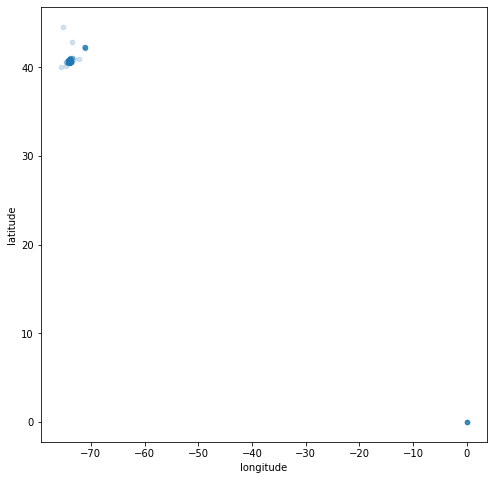

In [54]:
X.plot(kind = "scatter", x ="longitude", y ="latitude", alpha = 0.2, figsize=(8, 8))
plt.show()

У нас датасет по Нью-Йорку, да и на нулевых координатах океан, поэтому уберем их и выбросы

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

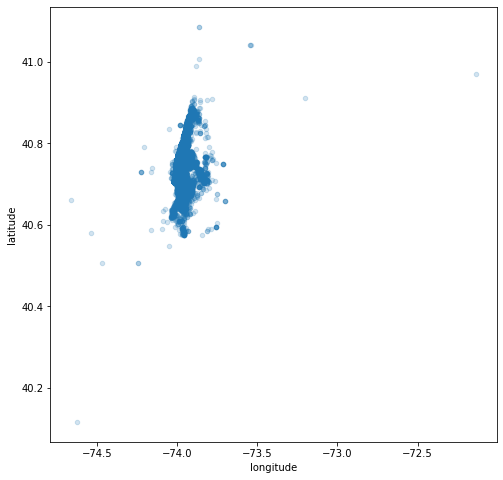

In [60]:
X.loc[(X['latitude'] > 35) & (X['latitude'] < 42) & (X['longitude'] > -75) & (X['longitude'] < -72)].plot(kind = "scatter", x ="longitude", y ="latitude", alpha = 0.2, figsize=(8, 8))

Перебором границ нашелся более менее нормальный вариант

In [61]:
X = X.loc[(X['latitude'] > 35) & (X['latitude'] < 42) & (X['longitude'] > -75) & (X['longitude'] < -72)]

In [64]:
X

,bathrooms,bedrooms,display_address,features,latitude,longitude,price,street_address,TARGET,cost_of_room,...,roof_deck,outdoor_space,new_construction,loft,balcony,garden/patio,terrace,dining_room,high_speed_internet,exclusive
0,1.0,3,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,-73.9918,4495,W 50 & AVE 10,medium,1123.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,-74.0322,2570,55 River Drive South,medium,1285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,-73.9751,1795,22 W 77 Street,low,1795.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,-74.0065,3400,100 John Street,low,1133.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,-74.0025,5695,321 West 16th Street,low,1423.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,1.0,1,29th St,['No pets'],40.7653,-73.9248,1950,30-95 29th St,low,975.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34542,1.0,0,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,-73.9901,2600,39 E 1st St,medium,2600.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34543,2.0,2,50th Avenue,[],40.7437,-73.9585,5110,2-01 50th Avenue,low,1277.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34544,1.0,2,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,-73.9866,3400,400 West 56th Street,medium,1133.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Спсиок фичей можно дропнуть; в street_address дом и улица, а в display_address только улица, первое убираем

In [67]:
X.drop(columns=['features', 'street_address'], inplace=True)
X

C:\Users\danil\AppData\Local\Temp\ipykernel_6312\3662060379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['features', 'street_address'], inplace=True)


,bathrooms,bedrooms,display_address,latitude,longitude,price,TARGET,cost_of_room,log_price,log_cost,...,roof_deck,outdoor_space,new_construction,loft,balcony,garden/patio,terrace,dining_room,high_speed_internet,exclusive
0,1.0,3,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,40.7647,-73.9918,4495,medium,1123.750000,8.410721,7.024427,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,55 River Drive South,40.7275,-74.0322,2570,medium,1285.000000,7.851661,7.158514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,W 77 Street,40.7798,-73.9751,1795,low,1795.000000,7.492760,7.492760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2,John Street,40.7081,-74.0065,3400,low,1133.333333,8.131531,7.032918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,3,West 16th Street,40.7416,-74.0025,5695,low,1423.750000,8.647344,7.261050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,1.0,1,29th St,40.7653,-73.9248,1950,low,975.000000,7.575585,6.882437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34542,1.0,0,E 1st St,40.7239,-73.9901,2600,medium,2600.000000,7.863267,7.863267,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34543,2.0,2,50th Avenue,40.7437,-73.9585,5110,low,1277.500000,8.538955,7.152660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34544,1.0,2,400 West 56th Street,40.7673,-73.9866,3400,medium,1133.333333,8.131531,7.032918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'cost_of_room'}>],
       [<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_cost'}>,
        <AxesSubplot:title={'center':'month_year_cnt'}>,
        <AxesSubplot:title={'center':'week_year_cnt'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day_of_week'}>],
       [<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'words'}>,
        <AxesSubplot:title={'center':'num_of_photos'}>,
        <AxesSubplot:title={'center':'laundry_in_unit'}>,
        <AxesSubplot:title={'center':'no_fee'}>,
        <AxesSubplot:title={'center':'elevator'}>],
       [<AxesSubplot:title={'center':'dogs_allowed'}>,
      

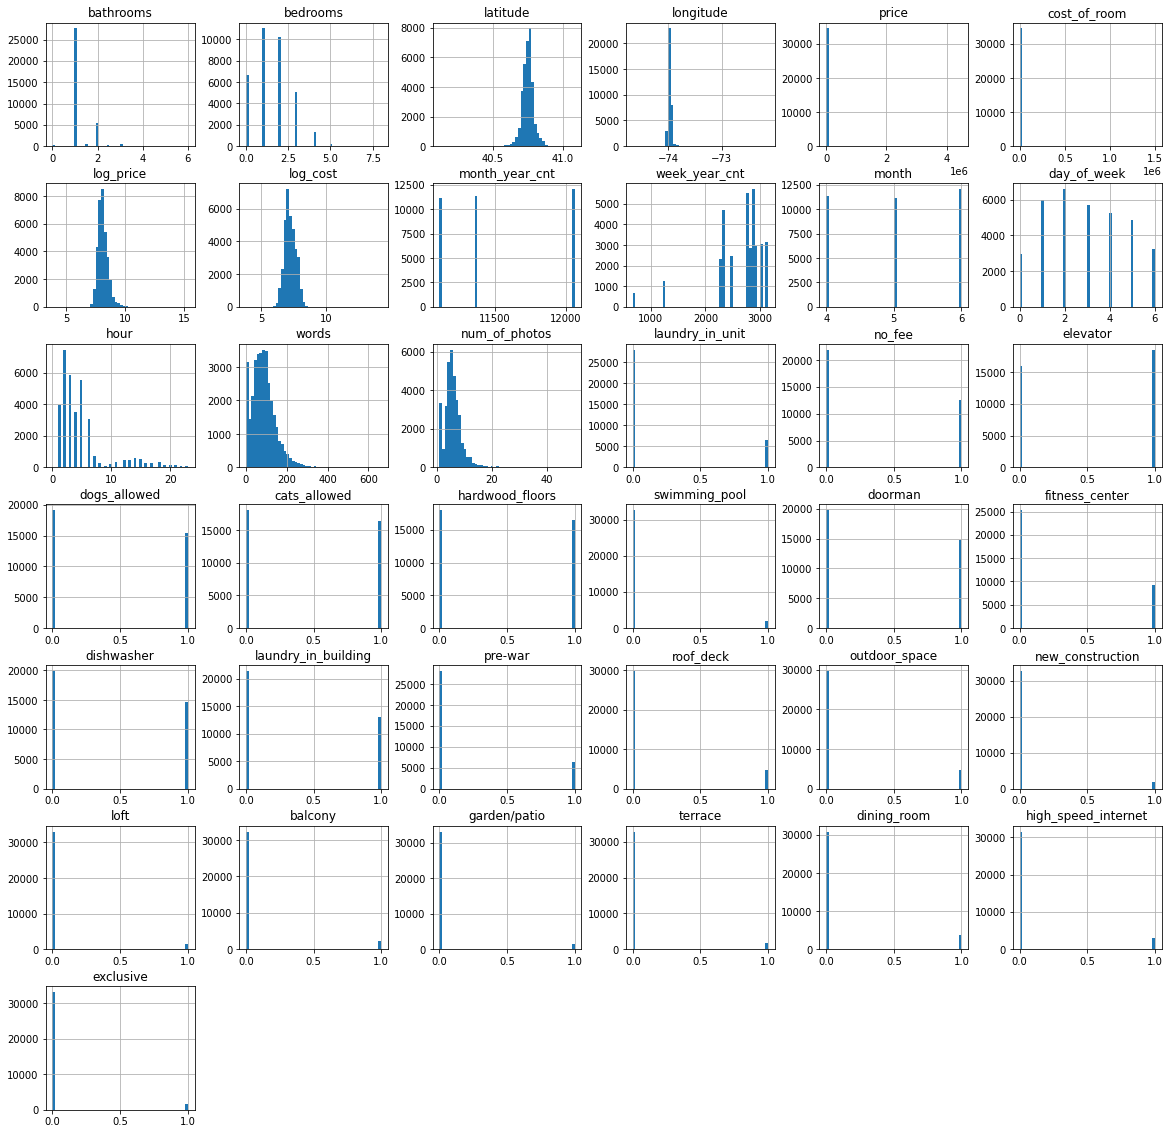

In [69]:
X.hist(bins=50, figsize=(20,20))

Количество фото можно тоже прологарифмировать

In [84]:
def log_photos(data):
    data['log_photo'] = np.log(data['num_of_photos'])

In [85]:
log_photos(X)

C:\Users\danil\AppData\Local\Temp\ipykernel_6312\173883547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_photo'] = np.log(data['num_of_photos'])


Времени на обработку названий улиц и вычисления их популярности уже нет, поэтому дропаем и обучаем модель...

In [88]:
X.drop(columns=['display_address'], inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_6312\2080338822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['display_address'], inplace=True)


In [92]:
y_train = X['TARGET']
X_train = X.drop(columns=['TARGET'])

In [147]:
X_test_d = X_test_raw

In [148]:
calc_cost_of_room(X_test_d)
log_prices(X_test_d)
add_times(X_test_d)
add_words(X_test_d)
add_photos(X_test_d)
log_photos(X_test_d)
add_features(X_test_d)
X_test_d.drop(columns=['features', 'street_address', 'display_address', 'manager_id', 'listing_id', 'building_id'], inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_6312\2086041422.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week_year = (data.created.dt.weekofyear + data.created.dt.year * 100)


In [149]:
X_test = X_test_d.drop(columns='Id')
y_test = X_test_d['Id']

In [151]:
from sklearn.linear_model import LogisticRegression

In [154]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear') #l1, чтобы убрались незначительные признаки

In [155]:
log_reg.fit(X_train, y_train)

c:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

In [156]:
lr_pred = log_reg.predict(X_test)

c:\Users\danil\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [161]:
from sklearn.metrics import accuracy_score

In [163]:
accuracy_score(y_test, lr_pred)

0.6945157368634337